In [71]:
# load  the  MCAS data from the  excel spreadsheet and import libraries 
%matplotlib inline
import numpy as np 
import  pandas as  pd 
import seaborn as sns
import matplotlib.pyplot as plt
from numpy  import array
from sklearn import linear_model# to implemenyt linear regression 
from sklearn import metrics # to  evaluate model  performance 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split#  to  create train and test sets 
from sklearn.base import TransformerMixin # used for  the  encoding of  categorical variables by the  median in the respective array 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score#for metrics
from sklearn.externals import joblib#persists the model afrer getting trained 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import *

In [2]:

#reading the 18.19 results  for MCAS performance 
MCAS_1819=pd.read_excel("AcademicPerformanceData MCAS Iready Grades for NU(1).xlsx",sheetname="18.19 MCAS")

display(MCAS_1819)
# reading the unique  id that defines students in the MCAS
student_and_sas=pd.read_excel("AcademicPerformanceData MCAS Iready Grades for NU(1).xlsx",sheetname="Student ID and SASIDs")
display(student_and_sas)

,adminyear,sprp_dis_name,sprp_sch_name,testschoolname,sasid,grade,gradesims,gender,race,yrsinmass,...,msgp2016,msgp2017,msgp2018,ecss2020,mcss2020,scss2020,summarize,amend,datachanged,uniqueID
0,2019,Watertown,Cunniff,Cunniff,1047531036,3,3,M,H,3,...,,,,471,473,,1,,,1047531036
1,2019,Watertown,Cunniff,Cunniff,1033412130,3,3,F,H,4,...,,,,502,487,,1,,,1033412130
2,2019,Watertown,Cunniff,Cunniff,1044531033,3,3,M,W,3,...,,,,508,541,,1,,,1044531033
3,2019,Watertown,Cunniff,Cunniff,1002531036,3,3,F,H,3,...,,,,474,492,,1,,,1002531036
4,2019,Watertown,Cunniff,Cunniff,1030211831,3,3,F,W,4,...,,,,510,509,,1,,,1030211831
5,2019,Watertown,Cunniff,Cunniff,1097400644,3,3,F,H,1,...,,,,,,,1,,,1097400644
6,2019,Watertown,Cunniff,Cunniff,1077532031,3,3,F,H,4,...,,,,508,492,,1,,,1077532031
7,2019,Watertown,Cunniff,Cunniff,1026531033,3,3,F,W,3,...,,,,499,522,,1,,,1026531033
8,2019,Watertown,Cunniff,Cunniff,1072794925,3,3,M,W,4,...,,,,474,477,,1,,,1072794925
9,2019,Watertown,Cunniff,Cunniff,1081211837,3,3,M,W,4,...,,,,495,473,,1,,,1081211837


,Student Number,SASID
0,301130,1.015487e+09
1,303526,1.011108e+09
2,350881,1.068300e+09
3,304145,1.000527e+09
4,302594,1.085606e+09
5,350446,1.046966e+09
6,305261,1.054221e+09
7,350490,1.001967e+09
8,301032,1.003761e+09
9,302190,1.039792e+09


In [3]:
student_and_sas=student_and_sas.rename(columns={"Student Number": "Student ID"})

In [4]:
# checking the sasid and student id so that race and ecodis  fom 18.19 sheet can be imported to the  math-i-ready dataset 

In [5]:
display(student_and_sas)

,Student ID,SASID
0,301130,1.015487e+09
1,303526,1.011108e+09
2,350881,1.068300e+09
3,304145,1.000527e+09
4,302594,1.085606e+09
5,350446,1.046966e+09
6,305261,1.054221e+09
7,350490,1.001967e+09
8,301032,1.003761e+09
9,302190,1.039792e+09


In [6]:
MCAS_1819=MCAS_1819.rename(columns={"sasid": "SASID"})

In [7]:
# getting the data mergerd  so that race and and the economic disadvantage features can be bought to the score dataset in order to comprehend if these factors effect score at all 
MCAS_1819_merged = pd.merge(MCAS_1819,
                 student_and_sas[['SASID','Student ID']],
                 on='SASID', 
                how='left')
display(MCAS_1819_merged)

,adminyear,sprp_dis_name,sprp_sch_name,testschoolname,SASID,grade,gradesims,gender,race,yrsinmass,...,msgp2017,msgp2018,ecss2020,mcss2020,scss2020,summarize,amend,datachanged,uniqueID,Student ID
0,2019,Watertown,Cunniff,Cunniff,1047531036,3,3,M,H,3,...,,,471,473,,1,,,1047531036,305309.0
1,2019,Watertown,Cunniff,Cunniff,1033412130,3,3,F,H,4,...,,,502,487,,1,,,1033412130,305641.0
2,2019,Watertown,Cunniff,Cunniff,1044531033,3,3,M,W,3,...,,,508,541,,1,,,1044531033,305310.0
3,2019,Watertown,Cunniff,Cunniff,1002531036,3,3,F,H,3,...,,,474,492,,1,,,1002531036,305351.0
4,2019,Watertown,Cunniff,Cunniff,1030211831,3,3,F,W,4,...,,,510,509,,1,,,1030211831,304974.0
5,2019,Watertown,Cunniff,Cunniff,1097400644,3,3,F,H,1,...,,,,,,1,,,1097400644,NaN
6,2019,Watertown,Cunniff,Cunniff,1077532031,3,3,F,H,4,...,,,508,492,,1,,,1077532031,305436.0
7,2019,Watertown,Cunniff,Cunniff,1026531033,3,3,F,W,3,...,,,499,522,,1,,,1026531033,305313.0
8,2019,Watertown,Cunniff,Cunniff,1072794925,3,3,M,W,4,...,,,474,477,,1,,,1072794925,304684.0
9,2019,Watertown,Cunniff,Cunniff,1081211837,3,3,M,W,4,...,,,495,473,,1,,,1081211837,304975.0


In [8]:
#The main MCAS ELA file 
literacy_I_Ready_df=pd.read_excel("AcademicPerformanceData MCAS Iready Grades for NU(1).xlsx",sheetname="Literacy I-Ready ")


In [9]:
result_literacy = pd.merge(literacy_I_Ready_df,
                 MCAS_1819_merged[['Student ID','race','ecodis']],
                 on='Student ID', 
                how='left')

In [10]:
display(result_literacy)
result_literacy.shape

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,Race,English Language Learner,Special Education,...,Diagnostic: Vocabulary Placement (Most Recent),Diagnostic: Vocabulary Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),Diagnostic: Reading Comprehension: Literature Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),Diagnostic: Reading Comprehension: Informational Text Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Relative Placement (Most Recent),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,NaN,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Reading,female,N,NaN,N,N,...,Early 9,On Level,658.0,Early 9,On Level,626.0,Level 8,1 Level Below,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,NaN,N,Y,...,Level 3,2 or More Levels Below,501.0,Level 3,2 or More Levels Below,513.0,Level 3,2 or More Levels Below,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,NaN,N,Y,...,Level 5,2 or More Levels Below,557.0,Level 4,2 or More Levels Below,591.0,Level 6,2 or More Levels Below,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Reading,male,N,NaN,N,N,...,Mid 2,On Level,511.0,Early 2,On Level,546.0,Late 2,On Level,NaN,NaN
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,NaN,N,Y,...,Late 8,On Level,675.0,Late 8,On Level,684.0,Late 8,On Level,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,NaN,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,NaN,Y,N,...,Level 4,2 or More Levels Below,564.0,Level 5,2 or More Levels Below,553.0,Level 4,2 or More Levels Below,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Reading,male,N,NaN,N,N,...,Late 5,On Level,621.0,Mid 5,On Level,604.0,Early 5,On Level,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Reading,female,N,NaN,N,Y,...,Level 1,2 or More Levels Below,500.0,Level 3,1 Level Below,499.0,Level 3,1 Level Below,B,0.0


(2506, 36)

In [11]:
result_literacy=result_literacy.drop(['Race','Economically Disadvantaged'],axis=1)

In [12]:
#printing column names 
for col in result_literacy.columns: 
    print(col) 


Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Diagnostic: Overall Relative Placement (Most Recent)
Diagnostic: Phonological Awareness Scale Score (Most Recent)
Diagnostic: Phonological Awareness Placement (Most Recent)
Diagnostic: Phonological Awareness Relative Placement (Most Recent)
Diagnostic: Phonics Scale Score (Most Recent)
Diagnostic: Phonics Placement (Most Recent)
Diagnostic: Phonics Relative Placement (Most Recent)
Diagnostic: High-Frequency Words Scale Score (Most Recent)
Diagnostic: High-Frequency Words Placement (Most Recent)
Diagnostic: High-Frequency Words Relative Placement (Most Recent)
Diagnostic: Vocabulary Scale Score (Most Recent)
Diagnostic: Vocabulary Placement (Most Recent)
Diagnostic: Vocabulary Relative Pl

In [13]:
result_literacy.isnull().sum()

Student ID                                                                                   0
Student Grade                                                                                0
Academic Year                                                                                0
School                                                                                       0
Subject                                                                                      0
Gender                                                                                       0
Hispanic or Latino                                                                           0
English Language Learner                                                                     0
Special Education                                                                            0
Number of Diagnostics Completed during the time frame                                        0
Diagnostic: Overall Scale Score (Most Recent)     

In [14]:
#printing column names 
for col in result_literacy.columns: 
    print(col) 

Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Diagnostic: Overall Relative Placement (Most Recent)
Diagnostic: Phonological Awareness Scale Score (Most Recent)
Diagnostic: Phonological Awareness Placement (Most Recent)
Diagnostic: Phonological Awareness Relative Placement (Most Recent)
Diagnostic: Phonics Scale Score (Most Recent)
Diagnostic: Phonics Placement (Most Recent)
Diagnostic: Phonics Relative Placement (Most Recent)
Diagnostic: High-Frequency Words Scale Score (Most Recent)
Diagnostic: High-Frequency Words Placement (Most Recent)
Diagnostic: High-Frequency Words Relative Placement (Most Recent)
Diagnostic: Vocabulary Scale Score (Most Recent)
Diagnostic: Vocabulary Placement (Most Recent)
Diagnostic: Vocabulary Relative Pl

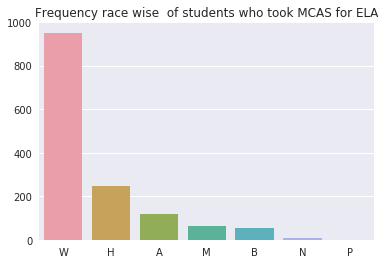

In [15]:
#finding out which  race was invested in taking the mcas the most 
race_count = result_literacy['race'].value_counts()
sns.set(style="darkgrid")
sns.barplot(race_count.index, race_count.values, alpha=0.9)
plt.title('Frequency race wise  of students who took MCAS for ELA')

plt.show()

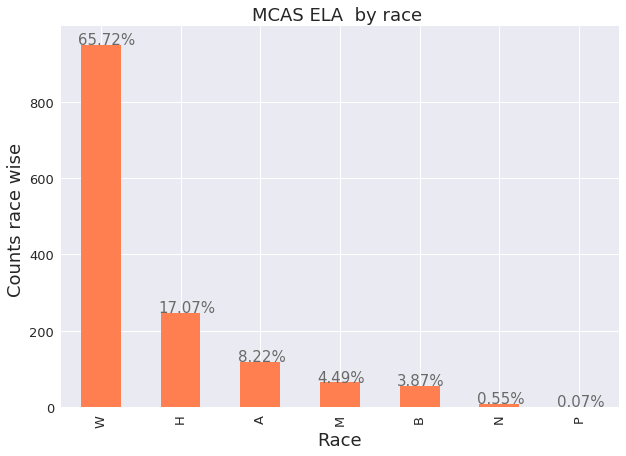

In [16]:
ax = result_literacy['race'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("MCAS ELA  by race ", fontsize=18)
ax.set_ylabel("Counts race wise ", fontsize=18);
ax.set_xlabel("Race", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

In [17]:
result_literacy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2505
Data columns (total 34 columns):
Student ID                                                                                2506 non-null int64
Student Grade                                                                             2506 non-null object
Academic Year                                                                             2506 non-null object
School                                                                                    2506 non-null object
Subject                                                                                   2506 non-null object
Gender                                                                                    2506 non-null object
Hispanic or Latino                                                                        2506 non-null object
English Language Learner                                                                  2506 non-null object
Specia

In [18]:
result_literacy_lc = result_literacy.copy()

In [19]:
display(result_literacy_lc)

result_literacy_lc.isnull().sum()

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Vocabulary Placement (Most Recent),Diagnostic: Vocabulary Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),Diagnostic: Reading Comprehension: Literature Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),Diagnostic: Reading Comprehension: Informational Text Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Relative Placement (Most Recent),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Reading,female,N,N,N,1,...,Early 9,On Level,658.0,Early 9,On Level,626.0,Level 8,1 Level Below,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,N,Y,1,...,Level 3,2 or More Levels Below,501.0,Level 3,2 or More Levels Below,513.0,Level 3,2 or More Levels Below,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Level 5,2 or More Levels Below,557.0,Level 4,2 or More Levels Below,591.0,Level 6,2 or More Levels Below,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Reading,male,N,N,N,1,...,Mid 2,On Level,511.0,Early 2,On Level,546.0,Late 2,On Level,NaN,NaN
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Late 8,On Level,675.0,Late 8,On Level,684.0,Late 8,On Level,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,Y,N,1,...,Level 4,2 or More Levels Below,564.0,Level 5,2 or More Levels Below,553.0,Level 4,2 or More Levels Below,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Reading,male,N,N,N,1,...,Late 5,On Level,621.0,Mid 5,On Level,604.0,Early 5,On Level,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Reading,female,N,N,Y,1,...,Level 1,2 or More Levels Below,500.0,Level 3,1 Level Below,499.0,Level 3,1 Level Below,B,0.0


Student ID                                                                                   0
Student Grade                                                                                0
Academic Year                                                                                0
School                                                                                       0
Subject                                                                                      0
Gender                                                                                       0
Hispanic or Latino                                                                           0
English Language Learner                                                                     0
Special Education                                                                            0
Number of Diagnostics Completed during the time frame                                        0
Diagnostic: Overall Scale Score (Most Recent)     

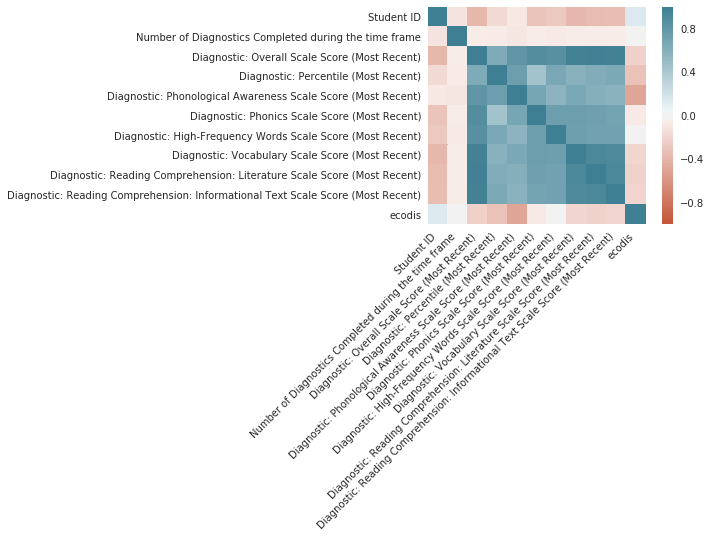

In [20]:
#corr plot with all columns and the null values after  merging the data set 
corr_math = result_literacy_lc.corr()
ax = sns.heatmap(
    corr_math, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

result_literacy_lc.isnull().sum()

needed to deal with the null values which are categorical they cannot be filled up with  mean and hence i have created a data frame imputer class that tranforms the null values and get them replaced
along with  frequently occuring values 

In [21]:
# needed to deal with the null values which are categorical they cannot be filled up with  mean and hence i have created a data frame imputer class that tranforms the null values and get them replaced
#along with  frequently occuring values 
class DataFrameImputer(TransformerMixin):

    def __init__(self):

        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 

        in column.

        Columns of other types are imputed with mean of column.

        """

    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]

            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],

            index=X.columns)

        return self

    def transform(self, X, y=None):

        return X.fillna(self.fill)


X = pd.DataFrame(result_literacy_lc)

xt = DataFrameImputer().fit_transform(X)

print('before...')

print(X)

print('after...')

display(xt)

before...
      Student ID Student Grade Academic Year                        School  \
0         301130            11     2018-2019         WATERTOWN HIGH SCHOOL   
1         303526             9     2018-2019         WATERTOWN HIGH SCHOOL   
2         304145             6     2018-2019       WATERTOWN MIDDLE SCHOOL   
3         302594             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
4         305261             2     2018-2019  JAMES RUSSEL LOWELL ELEM SCH   
5         302190             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
6         302462            11     2018-2019         WATERTOWN HIGH SCHOOL   
7         350513             7     2018-2019       WATERTOWN MIDDLE SCHOOL   
8         350506             5     2018-2019     CUNNIFF ELEMENTARY SCHOOL   
9         305014             4     2018-2019      HOSMER ELEMENTARY SCHOOL   
10        303030             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
11        350244             1     2018-2019      HOSM

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Vocabulary Placement (Most Recent),Diagnostic: Vocabulary Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),Diagnostic: Reading Comprehension: Literature Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),Diagnostic: Reading Comprehension: Informational Text Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Relative Placement (Most Recent),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Reading,female,N,N,N,1,...,Early 9,On Level,658.0,Early 9,On Level,626.0,Level 8,1 Level Below,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,N,Y,1,...,Level 3,2 or More Levels Below,501.0,Level 3,2 or More Levels Below,513.0,Level 3,2 or More Levels Below,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Level 5,2 or More Levels Below,557.0,Level 4,2 or More Levels Below,591.0,Level 6,2 or More Levels Below,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Reading,male,N,N,N,1,...,Mid 2,On Level,511.0,Early 2,On Level,546.0,Late 2,On Level,W,0.0
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Late 8,On Level,675.0,Late 8,On Level,684.0,Late 8,On Level,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,Y,N,1,...,Level 4,2 or More Levels Below,564.0,Level 5,2 or More Levels Below,553.0,Level 4,2 or More Levels Below,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Reading,male,N,N,N,1,...,Late 5,On Level,621.0,Mid 5,On Level,604.0,Early 5,On Level,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Reading,female,N,N,Y,1,...,Level 1,2 or More Levels Below,500.0,Level 3,1 Level Below,499.0,Level 3,1 Level Below,B,0.0


In [22]:
display(xt)

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Vocabulary Placement (Most Recent),Diagnostic: Vocabulary Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),Diagnostic: Reading Comprehension: Literature Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),Diagnostic: Reading Comprehension: Informational Text Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Relative Placement (Most Recent),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Reading,female,N,N,N,1,...,Early 9,On Level,658.0,Early 9,On Level,626.0,Level 8,1 Level Below,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,N,Y,1,...,Level 3,2 or More Levels Below,501.0,Level 3,2 or More Levels Below,513.0,Level 3,2 or More Levels Below,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Level 5,2 or More Levels Below,557.0,Level 4,2 or More Levels Below,591.0,Level 6,2 or More Levels Below,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Reading,male,N,N,N,1,...,Mid 2,On Level,511.0,Early 2,On Level,546.0,Late 2,On Level,W,0.0
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Late 8,On Level,675.0,Late 8,On Level,684.0,Late 8,On Level,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,Y,N,1,...,Level 4,2 or More Levels Below,564.0,Level 5,2 or More Levels Below,553.0,Level 4,2 or More Levels Below,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Reading,male,N,N,N,1,...,Late 5,On Level,621.0,Mid 5,On Level,604.0,Early 5,On Level,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Reading,female,N,N,Y,1,...,Level 1,2 or More Levels Below,500.0,Level 3,1 Level Below,499.0,Level 3,1 Level Below,B,0.0


In [23]:
#trying a different tranformation as a few null values  still persist
class GeneralImputer(Imputer):
    def __init__(self, **kwargs):
        Imputer.__init__(self, **kwargs)

    def fit(self, X, y=None):
        if self.strategy == 'most_frequent':
            self.fills = pd.DataFrame(X).mode(axis=0).squeeze()
            self.statistics_ = self.fills.values
            return self
        else:
            return Imputer.fit(self, X, y=y)

    def transform(self, X):
        if hasattr(self, 'fills'):
            return pd.DataFrame(X).fillna(self.fills).values.astype(str)
        else:
            return Imputer.transform(self, X)
        
        
        
X1 = pd.DataFrame(result_literacy_lc)

xt1= DataFrameImputer().fit_transform(X)

print('before...')

print(X1)

print('after...')

display(xt1)
xt1.isnull().sum()

before...
      Student ID Student Grade Academic Year                        School  \
0         301130            11     2018-2019         WATERTOWN HIGH SCHOOL   
1         303526             9     2018-2019         WATERTOWN HIGH SCHOOL   
2         304145             6     2018-2019       WATERTOWN MIDDLE SCHOOL   
3         302594             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
4         305261             2     2018-2019  JAMES RUSSEL LOWELL ELEM SCH   
5         302190             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
6         302462            11     2018-2019         WATERTOWN HIGH SCHOOL   
7         350513             7     2018-2019       WATERTOWN MIDDLE SCHOOL   
8         350506             5     2018-2019     CUNNIFF ELEMENTARY SCHOOL   
9         305014             4     2018-2019      HOSMER ELEMENTARY SCHOOL   
10        303030             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
11        350244             1     2018-2019      HOSM

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Vocabulary Placement (Most Recent),Diagnostic: Vocabulary Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),Diagnostic: Reading Comprehension: Literature Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),Diagnostic: Reading Comprehension: Informational Text Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Relative Placement (Most Recent),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Reading,female,N,N,N,1,...,Early 9,On Level,658.0,Early 9,On Level,626.0,Level 8,1 Level Below,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,N,Y,1,...,Level 3,2 or More Levels Below,501.0,Level 3,2 or More Levels Below,513.0,Level 3,2 or More Levels Below,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Level 5,2 or More Levels Below,557.0,Level 4,2 or More Levels Below,591.0,Level 6,2 or More Levels Below,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Reading,male,N,N,N,1,...,Mid 2,On Level,511.0,Early 2,On Level,546.0,Late 2,On Level,W,0.0
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Late 8,On Level,675.0,Late 8,On Level,684.0,Late 8,On Level,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,Y,N,1,...,Level 4,2 or More Levels Below,564.0,Level 5,2 or More Levels Below,553.0,Level 4,2 or More Levels Below,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Reading,male,N,N,N,1,...,Late 5,On Level,621.0,Mid 5,On Level,604.0,Early 5,On Level,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Reading,female,N,N,Y,1,...,Level 1,2 or More Levels Below,500.0,Level 3,1 Level Below,499.0,Level 3,1 Level Below,B,0.0


Student ID                                                                                0
Student Grade                                                                             0
Academic Year                                                                             0
School                                                                                    0
Subject                                                                                   0
Gender                                                                                    0
Hispanic or Latino                                                                        0
English Language Learner                                                                  0
Special Education                                                                         0
Number of Diagnostics Completed during the time frame                                     0
Diagnostic: Overall Scale Score (Most Recent)                                   

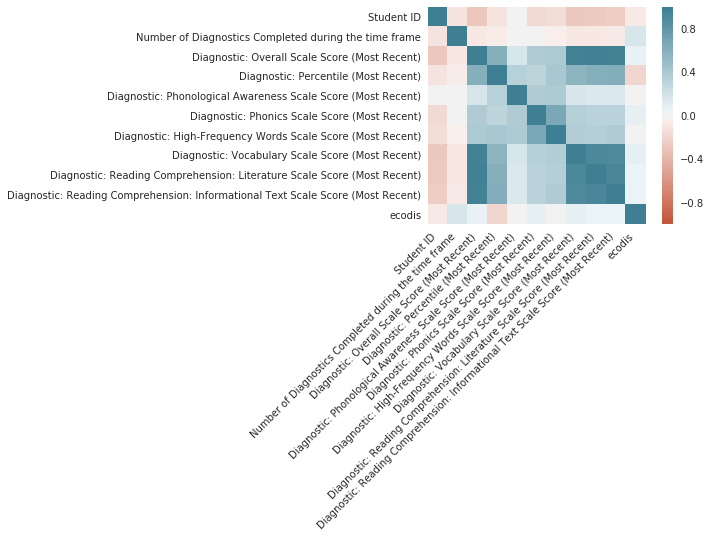

In [24]:
corr_ela = xt1.corr()
ax = sns.heatmap(
    corr_ela, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [26]:
xt1.isnull().sum()

df = xt1.copy()

for i in xt1.columns:
    print (i)


Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Diagnostic: Overall Relative Placement (Most Recent)
Diagnostic: Phonological Awareness Scale Score (Most Recent)
Diagnostic: Phonological Awareness Placement (Most Recent)
Diagnostic: Phonological Awareness Relative Placement (Most Recent)
Diagnostic: Phonics Scale Score (Most Recent)
Diagnostic: Phonics Placement (Most Recent)
Diagnostic: Phonics Relative Placement (Most Recent)
Diagnostic: High-Frequency Words Scale Score (Most Recent)
Diagnostic: High-Frequency Words Placement (Most Recent)
Diagnostic: High-Frequency Words Relative Placement (Most Recent)
Diagnostic: Vocabulary Scale Score (Most Recent)
Diagnostic: Vocabulary Placement (Most Recent)
Diagnostic: Vocabulary Relative Pl

In [27]:
xt1.shape
df.shape

(2506, 34)

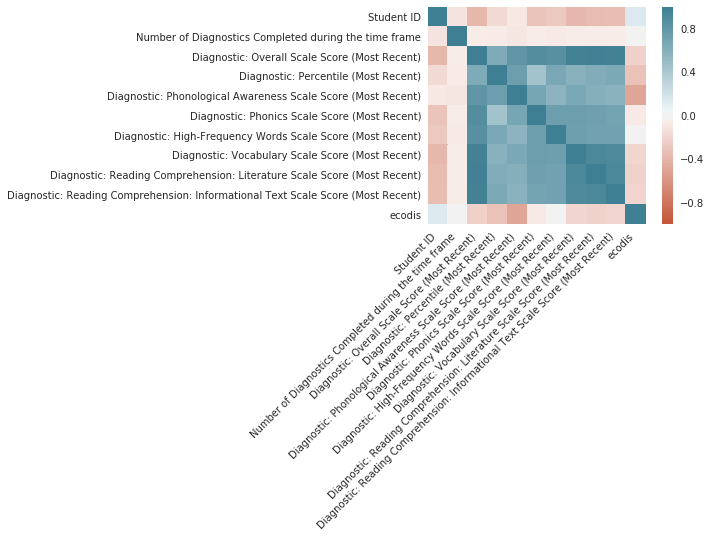

In [28]:
corr_ela = df.corr()
ax = sns.heatmap(
    corr_math, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [30]:
dfelaready=xt1.copy()

In [31]:
dfelaready.isnull().sum()

Student ID                                                                                0
Student Grade                                                                             0
Academic Year                                                                             0
School                                                                                    0
Subject                                                                                   0
Gender                                                                                    0
Hispanic or Latino                                                                        0
English Language Learner                                                                  0
Special Education                                                                         0
Number of Diagnostics Completed during the time frame                                     0
Diagnostic: Overall Scale Score (Most Recent)                                   

In [32]:
#this means that the data is cleaned 
dfelaready.shape

(2506, 34)

In [33]:
for i in dfelaready.columns:
    print (i)

Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Diagnostic: Overall Relative Placement (Most Recent)
Diagnostic: Phonological Awareness Scale Score (Most Recent)
Diagnostic: Phonological Awareness Placement (Most Recent)
Diagnostic: Phonological Awareness Relative Placement (Most Recent)
Diagnostic: Phonics Scale Score (Most Recent)
Diagnostic: Phonics Placement (Most Recent)
Diagnostic: Phonics Relative Placement (Most Recent)
Diagnostic: High-Frequency Words Scale Score (Most Recent)
Diagnostic: High-Frequency Words Placement (Most Recent)
Diagnostic: High-Frequency Words Relative Placement (Most Recent)
Diagnostic: Vocabulary Scale Score (Most Recent)
Diagnostic: Vocabulary Placement (Most Recent)
Diagnostic: Vocabulary Relative Pl

In [34]:
dfelaready_y = dfelaready.iloc[:,10].values

In [35]:
dfelaready_y

array([550., 645., 505., ..., 635., 550., 550.])

In [36]:
dfelaready_x=dfelaready.drop(['Student ID','Diagnostic: Overall Scale Score (Most Recent)','Academic Year','Subject'],axis=1)
print(dfelaready_x.shape) 

for i in dfelaready_x.columns:
    print(i)

(2506, 30)
Student Grade
School
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Diagnostic: Overall Relative Placement (Most Recent)
Diagnostic: Phonological Awareness Scale Score (Most Recent)
Diagnostic: Phonological Awareness Placement (Most Recent)
Diagnostic: Phonological Awareness Relative Placement (Most Recent)
Diagnostic: Phonics Scale Score (Most Recent)
Diagnostic: Phonics Placement (Most Recent)
Diagnostic: Phonics Relative Placement (Most Recent)
Diagnostic: High-Frequency Words Scale Score (Most Recent)
Diagnostic: High-Frequency Words Placement (Most Recent)
Diagnostic: High-Frequency Words Relative Placement (Most Recent)
Diagnostic: Vocabulary Scale Score (Most Recent)
Diagnostic: Vocabulary Placement (Most Recent)
Diagnostic: Vocabulary Relative Placement (Most Recent)
Diagnostic: Reading Comprehension: Literature 

In [37]:
dfelaready_x = pd.get_dummies(data=dfelaready_x, drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(dfelaready_x, dfelaready_y, test_size=0.2, random_state= 0)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2004, 238)
(502, 238)
(2004,)
(502,)


In [39]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
  predicted = model.predict(X_test)

In [41]:
print(predicted)

[507.58933837 550.03955981 549.91353351 523.53837423 550.02673746
 526.87929313 626.12829241 470.48634722 549.96058763 528.15614217
 604.51447735 633.17208943 344.99481423 454.09776834 549.94665348
 372.48686378 584.65894293 458.57396236 549.89959936 550.24383127
 636.29284199 691.35128322 630.06682183 579.13830308 526.41877337
 448.77060599 550.01129479 549.93750178 601.99311684 590.34188402
 483.72513056 517.70933204 636.58196694 441.98675123 530.86992239
 629.50273766 606.44375487 549.91580992 647.46985777 488.85684495
 373.89252648 614.62766843 385.12839241 645.17236572 549.71048015
 550.09827167 529.26991399 582.22923089 613.50716861 581.39933391
 443.08602523 550.00365161 658.80095598 581.31156096 526.23055682
 591.77410925 554.45842265 549.84738369 555.77583736 266.54989499
 490.84107326 628.42034465 617.60524876 377.91495053 577.60610177
 517.03425204 549.91353351 512.92599612 593.84910717 417.76991825
 667.74929673 549.96058763 604.53441706 550.06598602 572.47013355
 550.16442

In [42]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted':predicted})
df1 = df.head(25)

In [43]:

xt1.to_excel("literacy_I_Ready_cleaned.xlsx",
             sheet_name='ELA_Mcas_cleaned'
           )

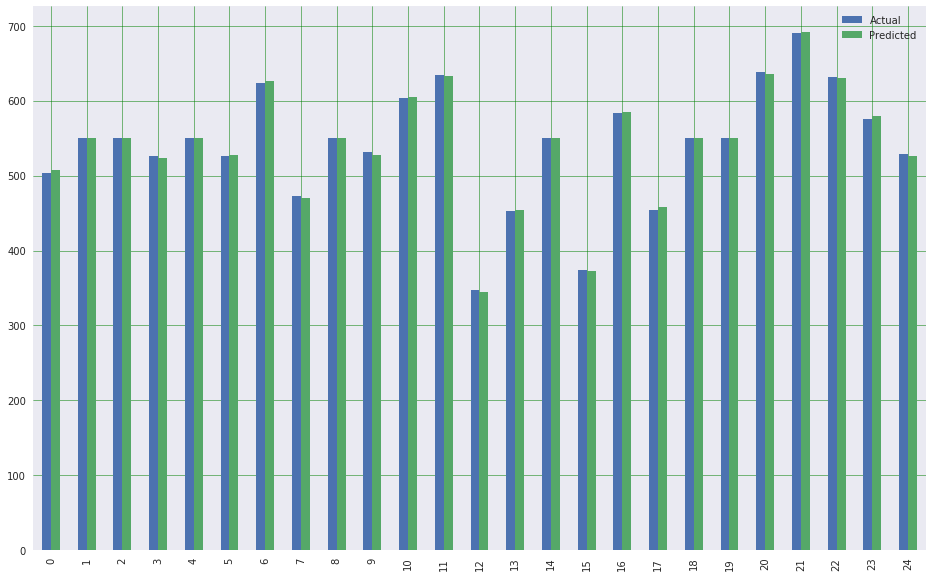

In [44]:
#as aobserved the model  performed a pretty good prediction indicating the overall scores meaning to say that the errror is  low 
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [45]:
coeff_df = pd.DataFrame(model.coef_, dfelaready_x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Number of Diagnostics Completed during the time frame,-0.006563
Diagnostic: Percentile (Most Recent),0.183141
Diagnostic: Phonological Awareness Scale Score (Most Recent),0.110650
Diagnostic: Phonics Scale Score (Most Recent),0.149647
Diagnostic: High-Frequency Words Scale Score (Most Recent),0.125901
Diagnostic: Vocabulary Scale Score (Most Recent),0.196351
Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),0.189159
Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),0.186732
ecodis,-0.305891
Student Grade_2,0.835125


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

Mean Absolute Error: 1.715613262971124
Mean Squared Error: 19.839791514938458
Root Mean Squared Error: 4.454188087063506


In [47]:
#so if  the student  has a race which  is multirace there is a higher chance that that student get a better overall score as compared to others 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


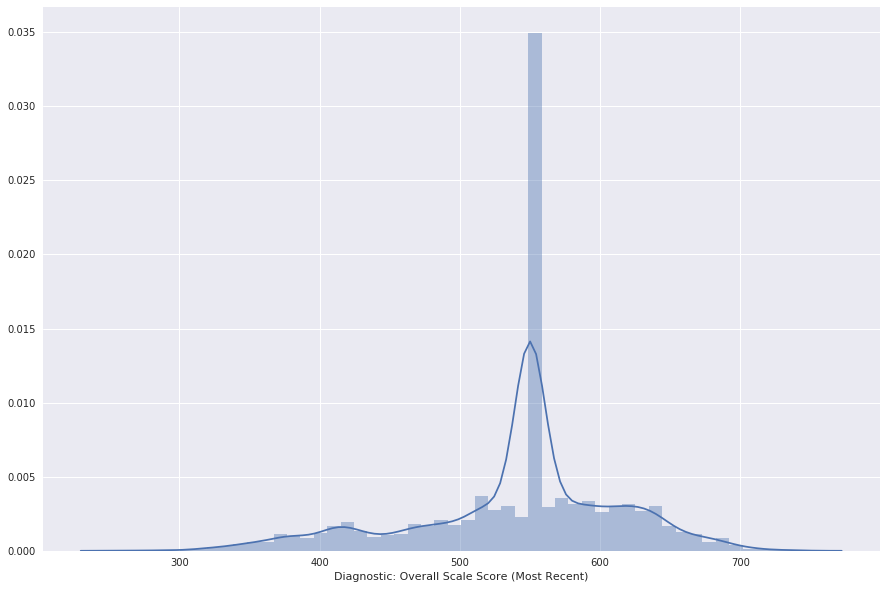

In [48]:
#finding out the distribution of the score it seems to  be a normal distribution and not skewed
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dfelaready['Diagnostic: Overall Scale Score (Most Recent)'])

In [49]:
dfelaready.describe()

,Student ID,Number of Diagnostics Completed during the time frame,Diagnostic: Overall Scale Score (Most Recent),Diagnostic: Percentile (Most Recent),Diagnostic: Phonological Awareness Scale Score (Most Recent),Diagnostic: Phonics Scale Score (Most Recent),Diagnostic: High-Frequency Words Scale Score (Most Recent),Diagnostic: Vocabulary Scale Score (Most Recent),Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),ecodis
count,2506.00000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,316352.87909,0.698723,541.829609,55.536313,410.050279,445.485235,442.276935,541.075419,544.948923,541.783320,0.189545
std,20974.72162,0.464094,72.973345,22.725782,19.380440,33.578495,28.928184,74.343768,75.579770,75.727717,0.392019
min,155002.00000,0.000000,262.000000,1.000000,226.000000,256.000000,250.000000,262.000000,240.000000,244.000000,0.000000
25%,303280.50000,0.000000,516.000000,48.000000,410.000000,446.000000,444.000000,517.000000,516.250000,514.000000,0.000000
50%,304942.50000,1.000000,550.000000,57.000000,410.000000,446.000000,444.000000,550.000000,554.000000,550.000000,0.000000
75%,350081.00000,1.000000,581.750000,66.000000,410.000000,446.000000,444.000000,579.000000,586.000000,582.000000,0.000000
max,351088.00000,2.000000,740.000000,99.000000,546.000000,611.000000,522.000000,744.000000,746.000000,754.000000,1.000000


In [50]:
#proceeding with a neural network in order to make  overall model prediction

#creating the test and train datasets

nn_df=pd.read_excel("literacy_I_Ready_cleaned.xlsx",sheetname="ELA_Mcas_cleaned")
nn_df.shape

(2506, 34)

In [51]:

df_y_ela=nn_df.iloc[:,10].values
df_y_ela
print(df_y_ela.shape)

df_x_ela=nn_df.drop(['Student ID','Diagnostic: Overall Scale Score (Most Recent)','Academic Year','Subject'],axis=1)
df_x_ela
df_x_ela.shape


(2506,)


(2506, 30)

In [52]:
df_x_ela = pd.get_dummies(data=df_x_ela, drop_first=True)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_x_ela, df_y_ela, test_size=0.2, random_state= 0)

number_of_columns=len(X_test1.columns)
print(X_test1.shape)

#creating the mdoel
model_nn=Sequential()
model_nn.add(Dense(50,input_dim=number_of_columns,activation="relu"))

model_nn.add(Dense(100,activation='relu'))

model_nn.add(Dense(50, activation='relu'))

model_nn.add(Dense(1, activation='linear'))
print(len(X_test1.columns))

(502, 238)
238


In [53]:
model_nn.compile(loss='mse',optimizer='adam')
print(X_train1.values)
model_nn.fit(X_train1.values,Y_train1,epochs=50,shuffle=True,verbose=2)

[[  1  26 410 ...   0   0   0]
 [  0  57 410 ...   0   0   1]
 [  0  57 410 ...   0   0   0]
 ...
 [  1  82 410 ...   0   0   1]
 [  1  40 410 ...   0   0   1]
 [  0  57 410 ...   0   0   1]]
Epoch 1/50
0s - loss: 68698.1831
Epoch 2/50
0s - loss: 840.2710
Epoch 3/50
0s - loss: 686.1626
Epoch 4/50
0s - loss: 584.1790
Epoch 5/50
0s - loss: 482.6742
Epoch 6/50
0s - loss: 384.1494
Epoch 7/50
0s - loss: 296.1153
Epoch 8/50
0s - loss: 204.5784
Epoch 9/50
0s - loss: 130.1611
Epoch 10/50
0s - loss: 84.5204
Epoch 11/50
0s - loss: 57.7193
Epoch 12/50
0s - loss: 44.6787
Epoch 13/50
0s - loss: 37.1133
Epoch 14/50
0s - loss: 33.6438
Epoch 15/50
0s - loss: 30.6730
Epoch 16/50
0s - loss: 30.7383
Epoch 17/50
1s - loss: 29.0045
Epoch 18/50
0s - loss: 27.5493
Epoch 19/50
0s - loss: 27.0630
Epoch 20/50
0s - loss: 26.1430
Epoch 21/50
0s - loss: 24.9967
Epoch 22/50
0s - loss: 24.3380
Epoch 23/50
0s - loss: 23.4086
Epoch 24/50
0s - loss: 23.3912
Epoch 25/50
0s - loss: 21.9421
Epoch 26/50
0s - loss: 22.4441


In [69]:
test_error_rate=model_nn.evaluate(X_test1.values,Y_test1,verbose=0)

In [58]:
#the test error rate 
print(test_error_rate)

print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

8.52418731978215
(2004, 238)
(502, 238)
(2004,)
(502,)


In [59]:
X_test1.shape

(502, 238)

In [75]:
#this reshaping will only work when you import array from numpy 
X_test1=array(X_test1).reshape(502,238)

print(Y_test1.shape)
predictnn=model_nn.predict(X_test1)
predictnn=array(predictnn).reshape(502,)
print(predictnn.shape)

(502,)
(502,)


In [77]:
df_n = pd.DataFrame({'Actual': Y_test1, 'Predicted':predictnn})
df_n = df_n.head(25)

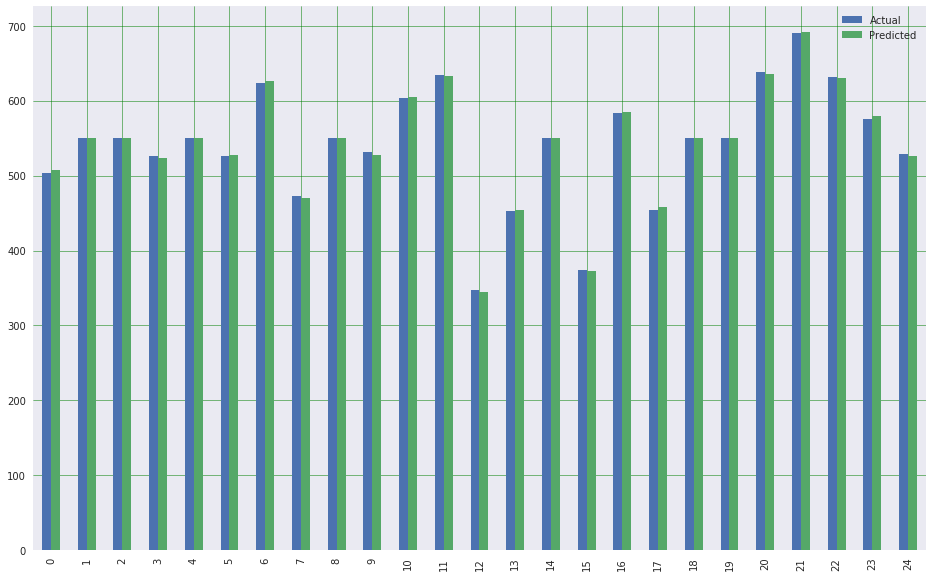

In [78]:
df_n = df.head(25)
df_n.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# checking how good the neural net model is as the actual and the predicted values are almost the same 